In [1]:
import numpy as np
from numpy import cos, sin, pi, sqrt, arccos, log
import matplotlib.pyplot as plt

In [2]:
def clamp(x, xmin, xmax):
    return min(max(xmin, x), xmax)
    
def compute_greens_potential_on_surface(x, y, N):
    xp = x[1::]
    yp = y[1::]
    xm = x[0:-1]
    ym = y[0:-1]
    
    barx = 0.5 * (xp + xm)
    bary = 0.5 * (yp + ym)
    ds = sqrt((xp - xm) ** 2 + (yp - ym) ** 2)
    #nn1 = -barx / sqrt(barx ** 2 + bary ** 2)
    # this way of computing the unit normal vector component nn1 also works for ellipse and square
    nn1 = -np.cos(np.arctan2((yp - ym),(xp - xm))-pi/2)

    hh = np.zeros(N)
    dtheta = np.zeros([N,N])
    for i in range(N):

        for j in range(N):
            a1 = xm[j] - barx[i]
            a2 = ym[j] - bary[i]
            b1 = xp[j] - barx[i]
            b2 = yp[j] - bary[i]

            # we constrain the argument between -1 and 1 to avoid numerical issues due to round-off errors
            ttemp = clamp((a1 * b1 + a2 * b2) / sqrt( (a1**2 + a2**2) * (b1**2 + b2**2)), -1, 1)
            dtheta[i, j] = -arccos(ttemp)
            if j - i == 0:
                dtheta[i, j] = -pi # for m=n
            x1g = 0.5 * (xp[j] - xm[j]) / sqrt(3) + barx[j]
            y1g = 0.5 * (yp[j] - ym[j]) / sqrt(3) + bary[j]
            x2g = -0.5 * (xp[j] - xm[j]) / sqrt(3) + barx[j]
            y2g = -0.5 * (yp[j] - ym[j]) / sqrt(3) + bary[j]
            hh0 = log((x1g - barx[i])**2 + (y1g - bary[i])**2)
            hh0 = hh0 + log((x2g - barx[i])**2 + (y2g - bary[i])**2)
            hh0 = hh0 * 0.5
            hh[i] += hh0 * nn1[j] * ds[j] / 2

    # the linear system is solved using a standard numpy linear algebra solver
    pdcr = (np.linalg.solve(dtheta, hh))

    # finally we compute the added mass
    da11 = pdcr * nn1 * ds
    a11 = np.sum(da11)

    return pdcr, a11, nn1


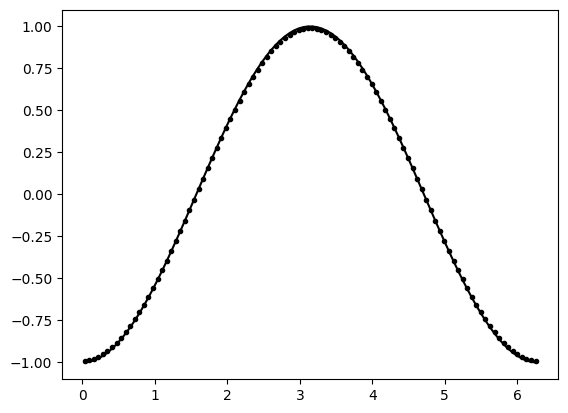

Added mass Circle:  3.1130374138979393
Added mass theoretical:  3.141592653589793


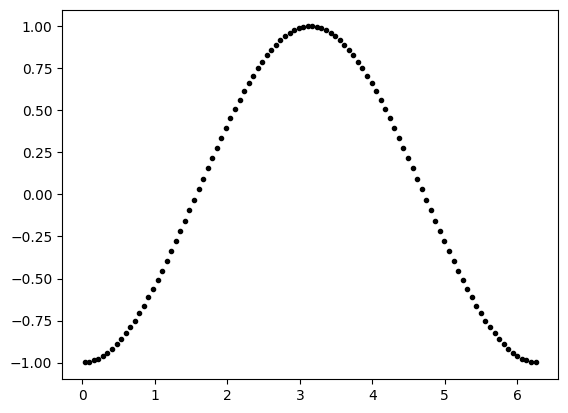

In [4]:
# # circle
N = 100
R0 = 1
theta = np.arange(0, 2 * pi + 2*pi/N, 2*pi/N)
bartheta = (theta[1::]+theta[0:-1])*0.5

x = R0*cos(theta)
y = R0*sin(theta)
pdcr, a11, n11 = compute_greens_potential_on_surface(x, y, N)
#
# 
barx = (x[0:-1] + x[1::])/2
bary = (y[0:-1] + y[1::])/2
pan = -barx / (barx**2 + bary**2)
a11_theo = pi*R0**2
#
plt.plot(bartheta, pdcr, 'k.')
plt.plot(bartheta, pan, 'k')
plt.show()
#
plt.plot(bartheta, n11,'k.')
#
print("Added mass Circle: ", a11)
print("Added mass theoretical: ", a11_theo)